# CA05 – kNN based Movie Recommender Engine

## Import the data

In [3]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors


In [4]:
#read in data
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv')

In [5]:
#see the first few lines of the df 
df.head()

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [6]:
#see the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie ID     30 non-null     int64  
 1   Movie Name   30 non-null     object 
 2   IMDB Rating  30 non-null     float64
 3   Biography    30 non-null     int64  
 4   Drama        30 non-null     int64  
 5   Thriller     30 non-null     int64  
 6   Comedy       30 non-null     int64  
 7   Crime        30 non-null     int64  
 8   Mystery      30 non-null     int64  
 9   History      30 non-null     int64  
 10  Label        30 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.7+ KB


In [7]:
#see the shape of the df

df.shape

(30, 11)

## Explore the data

In [8]:
#describe the data
df.describe()

,Movie ID,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,48.133333,7.696667,0.233333,0.600000,0.100000,0.100000,0.133333,0.100000,0.100000,0.0
std,29.288969,0.666169,0.430183,0.498273,0.305129,0.305129,0.345746,0.305129,0.305129,0.0
min,1.000000,5.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,27.750000,7.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,48.500000,7.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,64.250000,8.175000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,98.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [9]:
#count null values in each column
df.isnull().sum()

Movie ID       0
Movie Name     0
IMDB Rating    0
Biography      0
Drama          0
Thriller       0
Comedy         0
Crime          0
Mystery        0
History        0
Label          0
dtype: int64

Great! None of the columns have null values

In [10]:
#Check for duplicates

df.duplicated().sum()

0

No dupes either. Perfect!

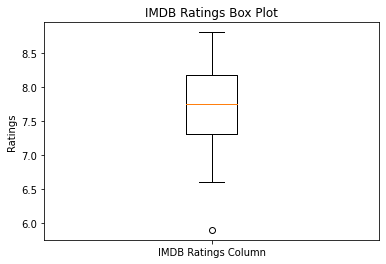

In [11]:
#import visualization libraries 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Create a box plot
plt.boxplot(df['IMDB Rating'], labels=['IMDB Ratings Column'])

# Add labels and title
plt.ylabel('Ratings')
plt.title('IMDB Ratings Box Plot')

# Display the plot
plt.show()



Looks like an outliers. We should drop it since KNN is outlier sensitive

In [12]:
#drop outliers where IMDB Rating is below 6. As Kmeans clustering is sensitive to outliers
df = df.drop(df[df['IMDB Rating'] < 6].index)

In [13]:
#check the shape to make sure the one row with an outlier was dropped
df.shape

(29, 11)

In [14]:
#show the dataframe
df.head()

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [15]:
#Drop the Movie ID column since it doesn't need to be included in the ML algorithim
#Drop the Movie Name column
df_dropped = df.drop(['Movie ID', 'Movie Name', 'Label'], axis = 1)

In [16]:
#let's make sure both columns were dropped

df_dropped.head()

,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History
0,8.0,1,1,1,0,0,0,0
1,7.7,0,1,0,0,0,1,0
2,8.2,1,1,0,0,0,0,0
3,8.3,0,1,0,0,0,0,0
4,8.8,0,1,0,0,0,0,0


## Build and Run KNN Model to Recommend Movies Similar to The Post

In [17]:
#define vectors for the post

the_post = [7.2, 1, 1, 0, 0, 0, 0, 1]

In [18]:
#Add the KNN algorithim
knn = NearestNeighbors(n_neighbors = 5, algorithm = 'auto', metric = 'minkowski')

#Fit the data to the model
knn.fit(df_dropped)

NearestNeighbors()

In [19]:
#Find the neighbors of the post
distances, indices = knn.kneighbors([the_post])

C:\Users\jadal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [20]:
#Print the movie reccomendations, the closest neighrbors to the post 
print('The 5 movies most similar to the post are:')
for index in indices[0]:
    print(df.iloc[index]['Movie Name'])

The 5 movies most similar to the post are:
12 Years a Slave
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind
